<a href="https://colab.research.google.com/github/musa-fe/Golden_Fibo/blob/main/GoldenFibo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Fibonacci Düzeltme Seviyeleri ve Altın Oran
Ben bu projede teknik analiz kısmında kullanılan fib düzeltmesini seçtim. Çünkü altın oran ve altın oranın türevlerinden oluşan seviyelerden oluşuyor.

Bu seviyelerden en bilinen ve en çok dikkat çeken oran %61.8. Bu oran, altın oranla doğrudan ilişkilidir. Yani, Fibonacci dizisindeki iki ardışık sayının oranı alındığında (örneğin, 34/55) bu değer %61.8 olarak karşımıza çıkar. Altın oran, doğanın birçok yerinde karşımıza çıkan estetik bir orandır, bu yüzden finans dünyasında da çok fazla ilgi görüyor.

Diğer düzeltme seviyelerine gelirsek, bunlar aslında %61.8’in etrafında dönen ve onun türevleri gibi düşünebiliriz:

%38.2: Bu oran, altın oranın bir parçası. Dizi üzerindeki sayılardan biriyle ilişkili olarak hesaplanıyor.
%23.6: Yine Fibonacci dizisindeki başka bir sayı kombinasyonundan geliyor ve aslında %38.2'nin devamı gibi düşünebiliriz.
%78.6: Bu seviye de %61.8’in bir uzantısı. Yani %100’den %61.8 çıkarılıyor ve bu oran çıkıyor.

Şimdi bu projede bu seviyeleri test edip çalışıp çalışmadığını anlamaya çalışacağız.

In [25]:
def calculate_fibonacci_levels(high, low, direction='down'):
    if direction == 'down':
        return {
            "0.236": high - 0.236 * (high - low),
            "0.382": high - 0.382 * (high - low),
            "0.5":   high - 0.5 * (high - low),
            "0.618": high - 0.618 * (high - low),
            "0.786": high - 0.786 * (high - low)
        }
    else:
        return {
            "0.236": low + 0.236 * (high - low),
            "0.382": low + 0.382 * (high - low),
            "0.5":   low + 0.5 * (high - low),
            "0.618": low + 0.618 * (high - low),
            "0.786": low + 0.786 * (high - low)
        }

In [26]:
symbol = "BTC-USD"
data = yf.download(symbol, start="2024-11-10", end="2025-04-10")


[*********************100%***********************]  1 of 1 completed


In [27]:
if data.empty:
    raise ValueError("Veri çekilemedi, tarih aralığını veya sembolü kontrol edin.")

In [32]:
high = float(data['High'].max())
low = float(data['Low'].min())
close_start = float(data['Close'].iloc[0])
close_end = float(data['Close'].iloc[-1])

<ipython-input-32-7734587cd018>:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  high = float(data['High'].max())
<ipython-input-32-7734587cd018>:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  low = float(data['Low'].min())
<ipython-input-32-7734587cd018>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  close_start = float(data['Close'].iloc[0])
<ipython-input-32-7734587cd018>:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  close_end = float(data['Close'].iloc[-1])


In [33]:
trend = 'up' if close_end > close_start else 'down'
levels = calculate_fibonacci_levels(high, low, direction=trend)

In [34]:
tepkiler = {}
for level_name, price in levels.items():
    mask = (data['Close'] < price * 1.01) & (data['Close'] > price * 0.99)
    tepkiler[level_name] = data[mask]

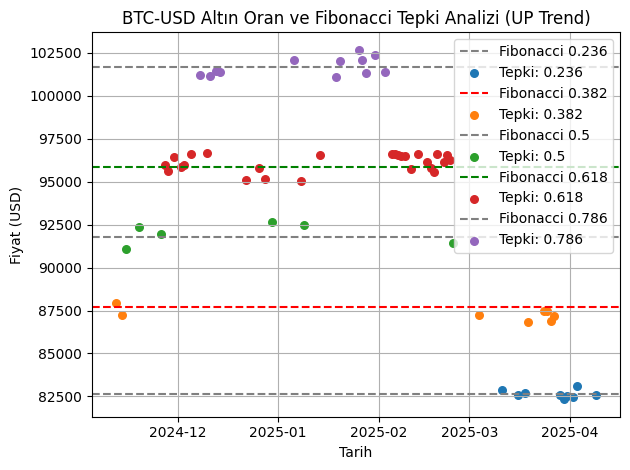

Fibonacci 0.236 seviyesine 151 gün boyunca fiyat yaklaşmış.
Fibonacci 0.382 seviyesine 151 gün boyunca fiyat yaklaşmış.
Fibonacci 0.5 seviyesine 151 gün boyunca fiyat yaklaşmış.
Fibonacci 0.618 seviyesine 151 gün boyunca fiyat yaklaşmış.
Fibonacci 0.786 seviyesine 151 gün boyunca fiyat yaklaşmış.


In [35]:
for level, price in levels.items():
    color = 'green' if level == "0.618" else 'red' if level == "0.382" else 'gray'
    plt.axhline(price, label=f"Fibonacci {level}", linestyle="--", color=color)
    if not tepkiler[level].empty:
        plt.scatter(tepkiler[level].index, tepkiler[level]['Close'], label=f"Tepki: {level}", s=30)

plt.title(f"{symbol} Altın Oran ve Fibonacci Tepki Analizi ({trend.upper()} Trend)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
for level, df in tepkiler.items():
    print(f"Fibonacci {level} seviyesine {len(df)} gün boyunca fiyat yaklaşmış.")

In [36]:
def analiz_tepkiler(df, level_price, temas_indexleri, gun_sayisi=5):
    farklar = []
    for tarih in temas_indexleri:
        idx = df.index.get_loc(tarih)
        if idx + gun_sayisi < len(df):
            sonraki_fiyat = df['Close'].iloc[idx + gun_sayisi]
            fark = ((sonraki_fiyat - level_price) / level_price) * 100
            farklar.append(fark)
    return farklar

Güncel grafiktende teyit ettiğimizde, çektiğimiz fib düzeltmesinin ve fiyatların doğru olduğunu gözlemliyoruz

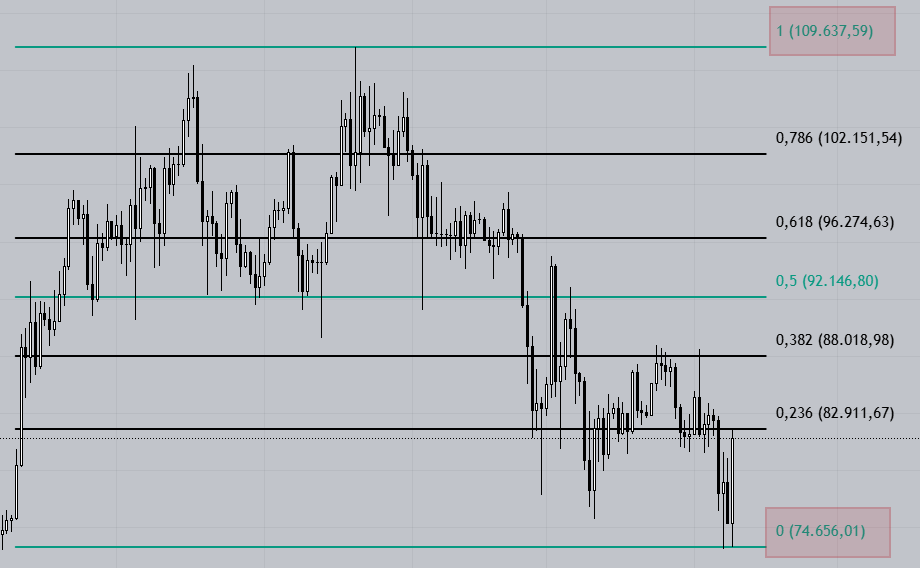